# Semi-Discrete Form

**강좌**: *기초 전산유체역학*

## Semi-discrete Formulation

앞선 수치 기법들은 시간에 대해서 1차 정확도 Euler Explicit 기법을 적용하였다.

공간에 대해서만 차분식을 적용하는 경우 편미분 차분식은 상미분 방정식 해석으로 생각할 수 있다.

공간에 대해 Central 기법을 적용하면 다음과 같다.

$$
\frac{d u_{j}}{d t} = - a \frac{1}{2 \Delta x} \left (u_{j+1} - u_{j-1} \right).
$$

이를 각 격자점에 대해 풀어서 표현하면

$$
\frac{d}{dt} 
\left [
\begin{matrix}
u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5
\end{matrix}
\right ]
= - a \frac{1}{2 \Delta x}
\left [
\begin{matrix}
 0 & 1 & 0 & 0 & 0 \\
-1 & 0 & 1 & 0 & 0 \\
 0 &-1 & 0 & 1 & 0 \\
 0 & 0 &-1 & 0 & 1 \\
 0 & 0 & 0 &-1 & 0 
\end{matrix}
\right ]
\left [
\begin{matrix}
u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5
\end{matrix}
\right ]
$$

즉 초기치 상미분 방정식 $y'=f(y,t), ~y(0)=y^0$ 형태로 생각할 수 있다.

몇 가지 상미분 방정식 해석 방법을 적용해보자.

### Revisit Explicit Euler Method
Euler Explicit Method는 다음과 같다.

$$
y_j^{n+1} = y_j^n + \Delta t f(y^n, t_n)
$$

### 정확도
- 수치해석시 오차는 다음과 같다.
    * Trunaction Error
    * Round-off Error
    
- Local truncation error (LTE)
    * Euler 기법의 경우 매 시간마다 오차가 발생한다.
    * LTE가 누적되어 Global truncation error가 된다. 
    * Taylor Expansion 적용하면
    
    $$
        y_{n+1} = y_n + h \frac{dy}{dt} + \frac{h^2}{2!} \frac{d^2y}{dt^2} + O(h^3)
    $$
    
    즉 오차는 다음과 같다.
        
    $$
        E_t = \frac{h^2}{2!} \frac{d^2y}{dt^2} + O(h^3) = O(h^2).
    $$

- 전 시간 영역에 대해서 오차가 누적되므로 1차 정확도 ($O(h)$)가 된다.

#### Stability of ODE
안정성을 분석하기 위해 Model problem을 생각한다.

$$
\frac{dy}{dt}=f(y,t) = f(y_0, t_0) + (t-t_0)f_t + (y - y_0) f_y + ... = \lambda y + Others
$$
$$
\frac{dy}{dt}= \lambda y, ~~~~\lambda = \lambda_R + i \lambda_i
$$

$\lambda_R < 0$ 인 경우 이 미분방정식은 해가 제한되어 (bounded) 있다.

Explicit Euler에 적용하면 다음과 같다.

$$
y^{n+1} = y^n(1 + \lambda h)
$$

여기서 $h=\Delta t$ 이다. 정리하면 

$$
y^n = y^0 (1 + \lambda h)^n = y_0 \sigma^n
$$

여기서 $|\sigma| < 1$ 일 때 수치 기법의 해가 발산하지 않는다.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

Text(0.5, 1.0, 'Stability region of Explicit Euler')

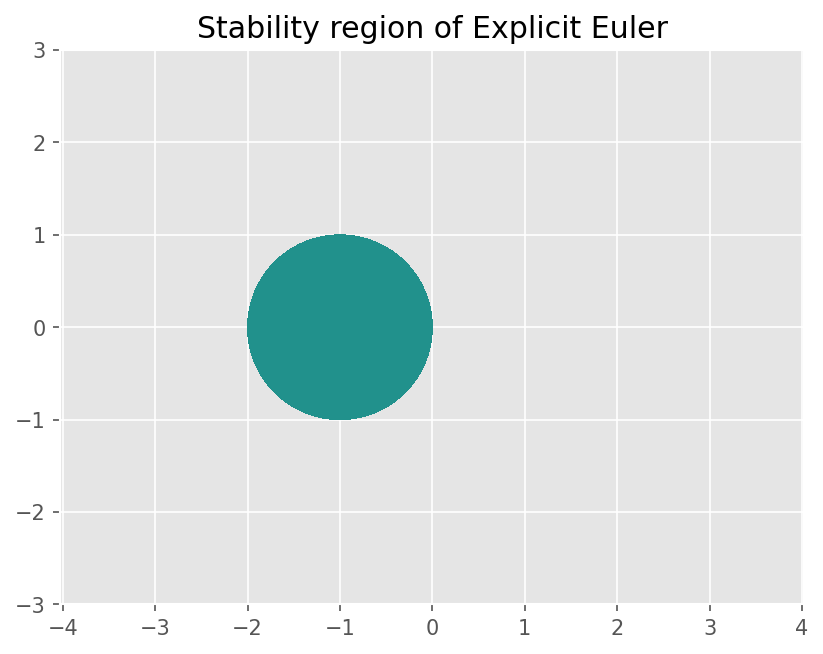

In [3]:
# Make grid
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)
X, Y = np.meshgrid(x, y)
z = X + Y*1j

# Amplication factor of Explicit Euler (z=lambda h)
sig = 1 + z

# Same scale of x and y
plt.axis('equal')

# Stability region
plt.contourf(X,Y,abs(sig), levels=[0, 1])

# Title
plt.title('Stability region of Explicit Euler')

#### Matrix Stability
상미분 방정식의 안정성 개념을 편미분 방정식으로 확장하면, 앞선 연산 행렬의 고유치의 최대 값을 모델 방정식의 $\lambda$ 로 생각하고 분석할 수 있다.

위 연산 행렬의 고유치는 다음과 같이 알려져 있다.

$$
\lambda_j = -\frac{a}{\Delta x} \left ( i \cos \frac{\pi j}{n_x} \right),~~ j=1,2,..., n_x
$$

Explicit Euler 기법의 안정성 영역을 보면 imaginary 축에서는 아주 작은 시간 간격에도 안정하지 않다. 
즉 Central Method 가 안정하지 않음을 알 수 있다.

이렇게 안정성을 분석하는 방법을 Matrix stability 라 한다. 다만 연산 행렬의 고유치를 구하는 과정이 쉽지 않다는 단점이 있다.

#### Modified Wavenumber Analysis
Von Neumann Stability 방법은 Fully-discrete formulation (time and space)에만 적용할 수 있다.

매우 비슷한 접근법이지만 Semi-discrete formulation에 사용 가능한 방법이 Modified Wavenumber 분석법이다.
이 방법 역시 선형 방정식이고, 경계 조건이 Periodic 일 때 사용 가능하다.

우선 PDE Solution을 $u(x, t) = \psi(t) e^{ikx}$ 로 생각한다. 이를 Wave 방정식에 적용하면 다음과 같다.

$$
\frac{d \psi}{dt} = -i a k \psi(t).
$$

차분식에 이와 같은 Solution $u_j = \psi(t) e^{ikx_j}$을 적용했을 때 Wavenumber 가 아래와 같이 변한다.

$$
\frac{d \psi}{dt} = -i a k' \psi(t),
$$

여기서 $k'$ 를 Modified Wavenumber 이다.


Central 기법 차분식에 대해 적용해보자.

$$
\frac{du(x_j, t)}{dt} = - a \frac{u(x_{j+1},t) - u(x_{j-1}, t)}{2 \Delta x}
$$

위 해를 적용하면,

$$
\frac{d \psi}{d t} e^{ikx_j} = - \frac{a}{\Delta x} \left (e^{ikx_j + \Delta x} - e^{ik(x_j - \Delta x)} \right) \psi 
$$

이를 정리하면

$$
\frac{d \psi}{d t} = - \frac{a}{2 \Delta x} \left (e^{ik\Delta x} - e^{-ik\Delta x} \right) \psi 
= - \frac{a}{\Delta x} i \sin(k \Delta x) \psi = -i a k' \psi.
$$

차분식에 의해 Modified wavenumber $k'$ 은 다음과 같다.

$$
k' = \frac{1}{\Delta x} \sin(k \Delta x)
$$

Stability 분석을 위해 모델 방정식 형태로 표현하면 $\lambda = -i a k' $ 이다. 허수이므로 Euler Explicit 에서는 불안정하다.

### 더 정확한 Explicit Method
정확도를 높이기 위해서 2가지 방법이 고려된다.

- Multi-stage method
  - 한 시간 간격 (step) 을 전진하기 위해 여러 Stage를 계산함
  
- Multi-step method
  - 한 시간 간격을 전진하기 위해 이전 여러 step의 결과를 활용함
  
이들은 모두 Taylor expansion에서 고차항을 근사한다.

#### Runge Kutta Method
Multi-stage 기법에 대표적인 방법으로 다음과 같은 과정으로 계산한다.

$$
\begin{align}
y_{n+1} &= y_n + h \sum_{i=1}^{s} b_i k_i \\
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + c_2 h, y_n + h (a_{21} k_1)) \\
k_3 &= f(t_n + c_3 h, y_n + h (a_{31} k_1 + a_{32} k_2))  \\
... \\
k_i & =  f(t_n + c_i h, y_n + h \sum_{j=1}^{i-1} a_{ij} k_j)\\
...
\end{align}
$$

Runge Kutta 기법의 계수는 다음 Butcher tableau로 표기한다.

$$
\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & ... & a_{1s} \\
c_2 & a_{21} & a_{22} & ... & a_{2s} \\
... & ... & ,,, & ,,, \\
c_s & a_{s1} & a_{s2} & ... & a_{ss} \\ \hline
    & b_1 & b_2 & ... & b_s
\end{array}
$$

##### 2차 정확도 Runge Kutta Method
$$
\begin{align}
y_{n+1} &= y_n + h (b_1 k_1 + b_2 k_2) \\
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + c_2 h, y_n + h a_{21} k_1) 
\end{align}
$$

- 무수히 많은 2차 Runge Kutta 법이 있다.

    $$
    b_1 = 1 -b_2 \\
    c_2 = a_{21} = \frac{1}{2 b_2}
    $$

- 이 기법은 2차 정확도를 갖는다.

   * Huen's method

        $$
        \begin{array}{c|cc}
        0 & 0 & \\
        1 & 1 & 0 \\ \hline
        & 1/2 & 1/2
        \end{array}
        $$

   * Midpoint method

        $$
        \begin{array}{c|cc}
        0 & 0 & \\
        1/2 & 1/2 & 0 \\ \hline
        & 0 & 1
        \end{array}
        $$

- 이 기법의 Stability는 다음과 같다.

$$
\sigma = 1 + \lambda h + \frac{1}{2} (\lambda h)^2
$$


##### 4차 정확도 Runge Kutta Method
$$
\begin{array}{c|cc}
0 & 0 & & & \\
1/2 & 1/2 & 0 & &  \\
1/2 & 0 & 1/2& 0 & 0 \\
1 & 0 & 0 & 1 & 0 \\ \hline
& 1/6 & 1/3 & 1/3 & 1/6
\end{array}
$$

- 이 기법은 4차 정확도를 갖는다.

- 이 기법의 Stability는 다음과 같다.

$$
\sigma = 1 + \lambda h + \frac{1}{2} (\lambda h)^2 + \frac{1}{6} (\lambda h)^3 + \frac{1}{24} (\lambda h)^4
$$

Text(0.5, 1.0, 'Stability region of RK2')

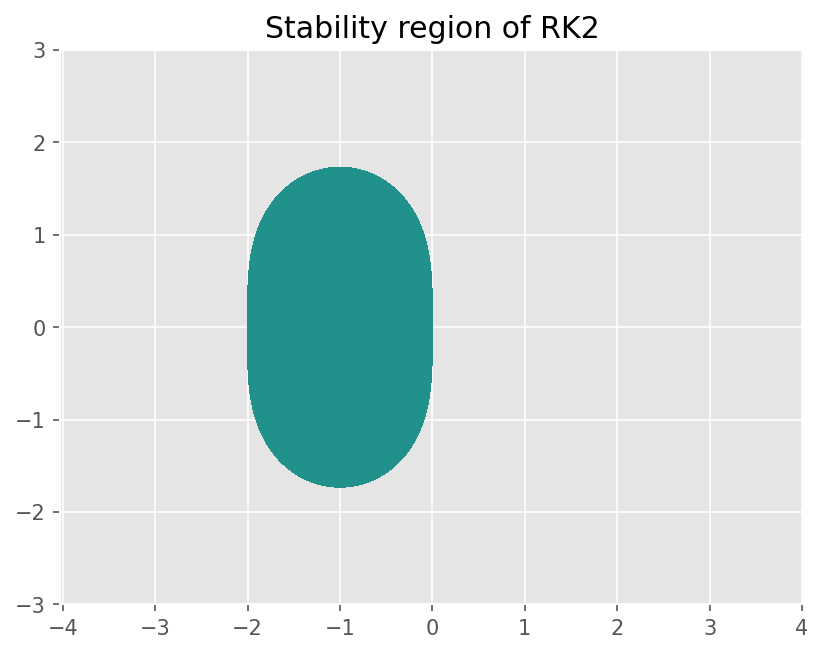

In [7]:
# Make grid
xx = np.linspace(-3, 3, 201)
yy = np.linspace(-3, 3, 201)
X, Y = np.meshgrid(xx, yy)
z = X + Y*1j

# Amplication factor of Explicit Euler (z=lambda h)
sig = 1 + z + 0.5*z**2

# Same scale of x and y
plt.axis('equal')

# Stability region
plt.contourf(X,Y,abs(sig), levels=[0, 1])

# Title
plt.title('Stability region of RK2')

Text(0.5, 1.0, 'Stability region of RK4')

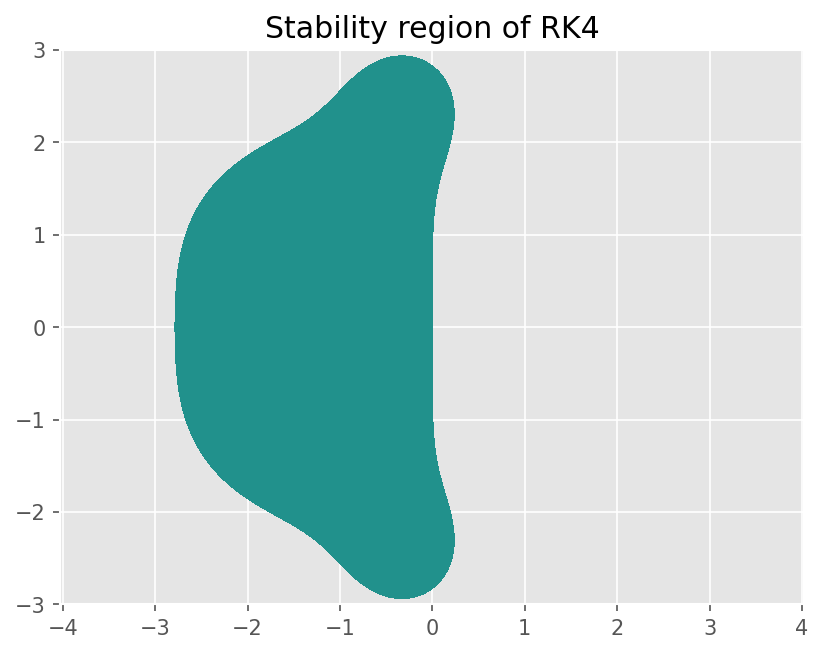

In [11]:
# Make grid
xx = np.linspace(-3, 3, 201)
yy = np.linspace(-3, 3, 201)
X, Y = np.meshgrid(xx, yy)
z = X + Y*1j

# Amplication factor of RK4 (z=lambda h)
sig = 1 + z + 0.5*z**2 + z**3/6 + z**4/24

# Same scale of x and y
plt.axis('equal')

# Stability region
plt.contourf(X,Y,abs(sig), levels=[0, 1])

# Title
plt.title('Stability region of RK4')

4차 Runge Kutta 기법을 안정성 영역은 $\lambda h$ 가 imaginary 축에서도 2.83까지 안정하다.
이를 적용한 Central difference 기법에 대해 경우 Modified wavenumber Analysis 결과는 다음과 같다.

$$
\Delta t < \frac{2.83}{|\lambda|} = \frac{2.83 a}{\Delta x}
$$

즉

$$
CFL = \frac{a \Delta t}{\Delta x} < 2.83.
$$

## 예제

### Modified Wavenumber analysis
Upwind 기법에 대한 Modified wavenumber 분석을 Real axis에서 수행하고, Euler Explicit 및 4차 Runge Kutta 기법을 적용했을 때 안정성을 분석하시오.

### 수치 실험
공간에 대해 Central, Upwind 차분법을 적용하고 시간에 대해서 4차 Runge Kutta 기법을 적용하자. Sine wave 문제를 해석해보자.
* 계산 시간을 늘려보자 ($t=5, 10, 15, 20$)
* 시간 간격을 늘려보고, Stability 결과와 비교해보자.

In [5]:
def central_rhs(nx, u, dx, a, du):
    for i in range(1, nx+2):
        du[i] = -0.5*a*(u[i+1] - u[i-1])/dx

In [6]:
def bc_periodic(u):
    # index (nx : -3), (nx+2 : -1)
    u[0] = u[-3]
    u[-1] = u[2]

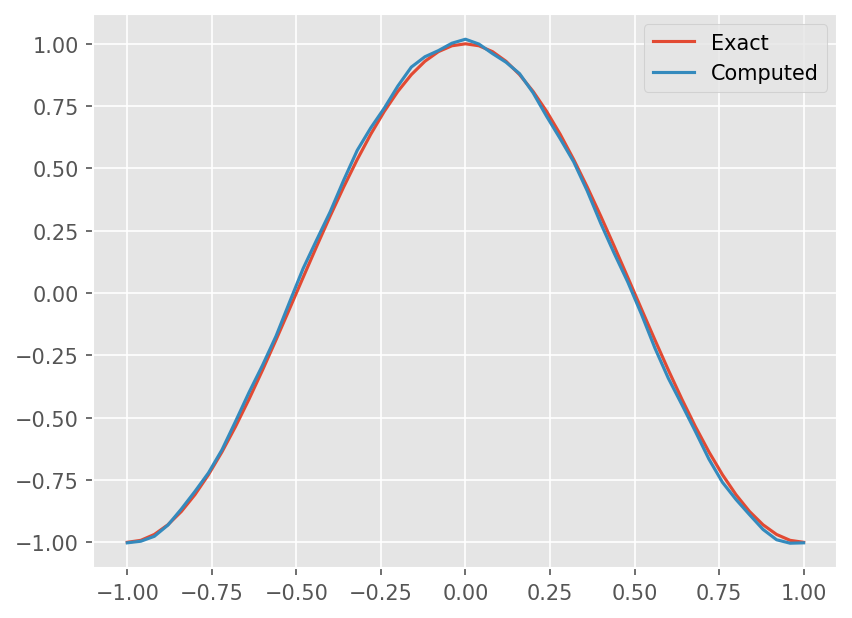

In [15]:
a = 1.0

nx = 50
cfl = 0.9
t_target = 15.5

# Make grid
x = np.linspace(-1, 1, nx+1)
dx = np.diff(x)[0]

# Solution array
u = np.empty(nx+3)
u0 = np.empty_like(u)
k1 = np.zeros_like(u)
k2 = np.zeros_like(u)

# Initialize
u[1:-1] = np.sin(np.pi*x)
bc_periodic(u)

# Time step
dt = cfl*dx/a

# Calculation
t = 0
while abs(t - t_target) > 1e-8:
    # Adjust time step to reach target time
    dt = min(dt, t_target - t)
    
    # First stage
    u0[:] = u
    bc_periodic(u)
    central_rhs(nx, u, dx, a, k1)
    u += 0.5*dt*k1
    
    # Second stage
    bc_periodic(u)
    central_rhs(nx, u, dx, a, k2)
    u = u0 + dt*k2    
    
    # Update
    t += dt
    
# Exact solution
u_exact = np.sin(np.pi*(x-a*t))
plt.plot(x, u_exact)
plt.plot(x, u[1:-1])
plt.legend(['Exact', 'Computed'])